# Example. Classification of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


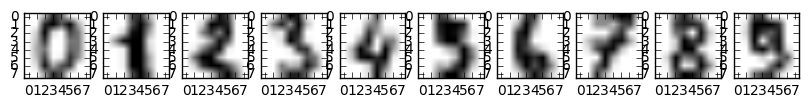

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Now apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
n=64 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
P = pca.fit_transform(X) #find principal components

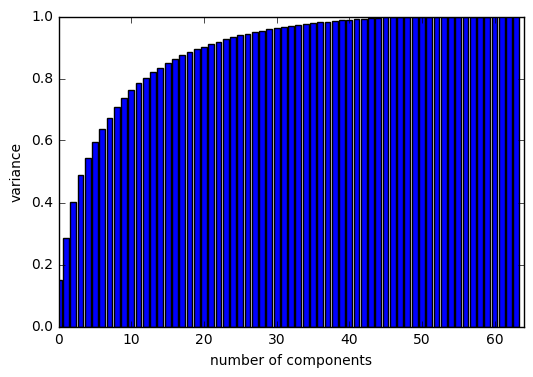

In [6]:
#Plot explained variance per number of leading PC's to choose
eigenvalues = pca.explained_variance_
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.ylim(0,1)
plt.xlim(0,64)
plt.xlabel('number of components')
plt.ylabel('variance')

Perfect Pareto rule: 20% leadning components explain 80% of variance

In [7]:
p=0.8
pca = PCA(p)
P1 = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P1.shape[1],100*p))

we need 13 PCs to explain 80.00 percent of variance


Now use three leading PCs to visualize the digits (different colors stand for different digits)

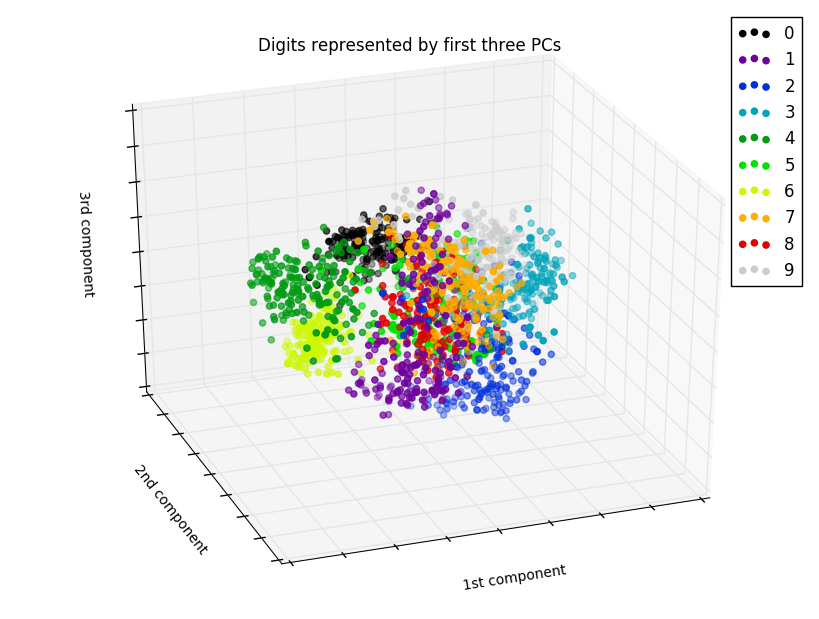

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.spectral(np.linspace(0, 1, 10))
for d in range(0,10):
    ind=y==d #take only images of a certain digit
    ax.scatter(P[ind, 0], P[ind, 1], P[ind, 2], color=cmap[d,:], label=d)
ax.set_title("Digits represented by first three PCs")
ax.set_xlabel("1st component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd component")
ax.w_zaxis.set_ticklabels([])
ax.legend()

plt.show()

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes2D
fig = plt.figure(1, figsize=(8, 6))
ax = plt.sublot(111)
cmap=plt.cm.spectral(np.linspace(0, 1, 10))
for d in range(0,10):
    ind=y==d #take only images of a certain digit
    ax.scatter(P[ind, 0], P[ind, 1], color=cmap[d,:], label=d)
ax.set_title("Digits represented by first three PCs")
ax.set_xlabel("1st component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd component")
ax.w_yaxis.set_ticklabels([])
ax.legend()

plt.show()

ImportError: cannot import name 'Axes2D'

In [ ]:

plt.figure(2, figsize=(8,6))
plt.scatter(P[y==D1, 0], P[y==D1, 1], color="Red")

### Task 1. 
Find examples of pairs of digits which can and can not be clearly distinguished on a 2D plot of first two PCs and/or second and third PCs

# Limitations: when PCA fails

PCA can only remove linear correlations in the data and help to reveal distinctions in linearly separable data. Non-linear relations might not be addressed

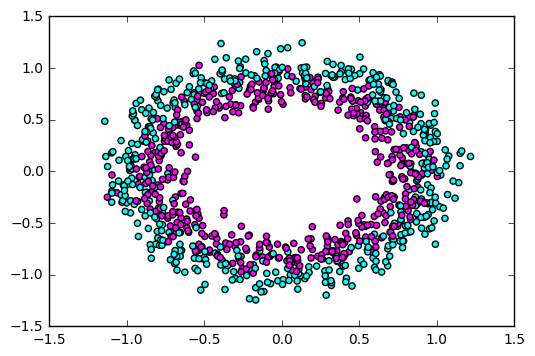

In [42]:
#generate and plot the data
from sklearn import datasets
X2,y2=datasets.make_circles(n_samples=1000, shuffle=True, noise=0.1)
plt.scatter(X2[:,0],X2[:,1], c=y2, cmap=plt.cm.cool)
plt.show()

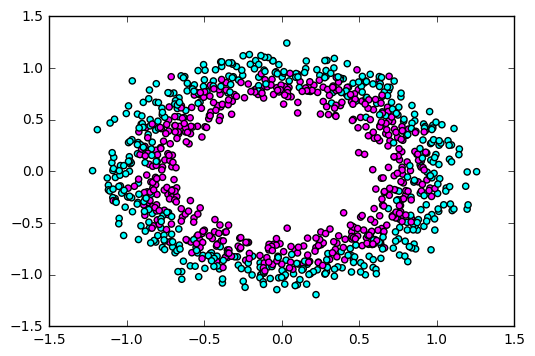

In [43]:
#transform the data using PCA; plot
clf = PCA(2) 
X_trans = clf.fit_transform(X2)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y2, cmap=plt.cm.cool)

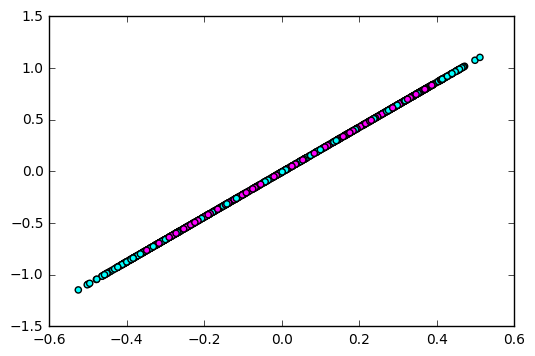

In [44]:
#plot the data along the first eigenvector
clf = PCA(1) 
X_trans = clf.fit_transform(X2)
X_new = clf.inverse_transform(X_trans) # transformed data
plt.scatter(X_new[:, 0], X_new[:, 1], c=y2, cmap=plt.cm.cool)
plt.show()

No distrinction could be found among projections on the first eigenvector (first PC), even though original 2D data could be geometrically distringuished